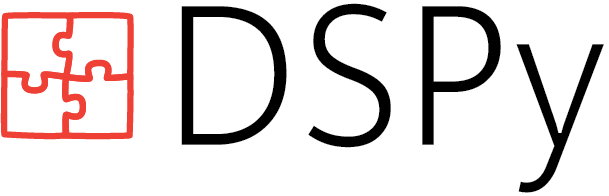

In the **DSPy** framework, the primary data type utilized for interactions with various modules `Example`. Given the huge repository of datasets available through Hugging Face, there's a significant opportunity to leverage these resources within DSPy. However, to make these datasets compatible and fully utilizable, they need to be converted into the `Example` data format.

Moreover, CSV files are a common format for storing and exchanging data, recognized for their simplicity and wide application across various domains. The conversion of data from CSV format into the `Example` format is a necessary requirement. But can we we do something to avoid this tedious process?

Introducing `DataLoaders`, a module aimed at simplifying the task of importing dataset from diverse sources, including HuggingFace and CSV files, into the `Example` format. `DataLoaders` are designed to abstract away the complexities and boilerplate involved in data conversion, offering a user-friendly interface for loading, transforming, and preparing data for use within the DSPy framework. This addition significantly enhances the ease of use of DSPy.

# Setting Up

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
import os

try: # When on google Colab, let's clone the notebook so we download the cache.
    import google.colab
    repo_path = 'dspy'
    !git -C $repo_path pull origin || git clone https://github.com/stanfordnlp/dspy $repo_path
except:
    repo_path = '.'

if repo_path not in sys.path:
    sys.path.append(repo_path)

# Set up the cache for this notebook
os.environ["DSP_NOTEBOOK_CACHEDIR"] = os.path.join(repo_path, 'cache')

import pkg_resources # Install the package if it's not installed
if not "dspy-ai" in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install -U pip
    # !pip install dspy-ai
    !pip install -e $repo_path

# Using `DataLoader`

Currently `DataLoader` provides support for data loading for following sources:

* HuggingFace using `from_huggingface()` method.
* CSV Files using `from_csv()` method.

We'll start by initializing the `DataLoader` object that takes same argument as that of [`Dataset`](https://github.com/stanfordnlp/dspy/blob/main/dspy/datasets/dataset.py) class which are dataset size (in % format) and seed for each of the three splits: `train`, `dev` and `test`.

In [ ]:
import dspy
from dspy.datasets import DataLoader

dl = DataLoader(
    train_size = 0.5,
    dev_size = 0.3,
    test_size = 0.2,
)

## Loading from HuggingFace

To load data from Hugging Face we have `from_huggingface` method which loads a dataset from Hugging Face's datasets library and processes it according to the object's configuration.

Parameters:
* `dataset_name`: The name of the dataset to load from Hugging Face's datasets.
* `fields`: An optional list of strings specifying which fields to include in the final datasets. If None, all fields in the dataset are included.
* `splits`: A string or list of strings specifying which splits of the dataset to load. If None, the entire dataset is loaded. If it's a list of splits, **it'll concatinate all the splits into 1 split**.
* `revision`: An optional string specifying the version of the dataset to load. Same parameter as that of datasets library.

In [ ]:
dolly_dataset = dl.from_huggingface(
    "databricks/databricks-dolly-15k",
    fields=["instruction", "context", "response"],
    splits="train" # or splits = ["train", "test"]
)

Once the above code is executed the data would be returned in a dict with keys `train`, `dev`, and `test` containing the List of `Example` for each split based on the configuration of size and seed set in the object during initialization:

In [ ]:
print(f"Keys present in the returned dict: {list(dolly_dataset.keys())}")

print(f"Number of examples in train set: {len(dolly_dataset['train'])}")
print(f"Number of examples in dev set: {len(dolly_dataset['dev'])}")
print(f"Number of examples in test set: {len(dolly_dataset['test'])}")

## Loading from CSV

To load data from CSV we have `from_csv` method which loads a dataset from CSV files and processes it according to the object's configuration just like `from_huggingface` method. Everything is the same as `from_huggingface` method except the arguments which are slightly different but not too much:

* `file_path`: The file path of the CSV file to load.
* `fields`: An optional list of strings specifying which columns to include in the final datasets. If None, all columns in the dataset are included.

In [ ]:
dl = DataLoader(
    train_size = 1.0, # Must be float
)

dolly_100_dataset = dl.from_csv(
    "dolly_subset_100_rows.csv",
    fields=["instruction", "context", "response"],
)

Once the above code is executed the data would be returned in a dict with keys `train`, `dev`, and `test` containing the List of `Example` for each split based on the configuration of size and seed set in the object during initialization

In [ ]:
print(f"Keys present in the returned dict: {list(dolly_100_dataset.keys())}")

print(f"Number of examples in train set: {len(dolly_100_dataset['train'])}")